# Analysis and Forecasting of Urban Parking Occupancy

Analyze and predict urban parking occupancy using statistical models and machine learning algorithms. Parking occupancy is a critical issue in modern cities, where the efficient management of parking resources can help reduce traffic, improve the driver experience and optimize the use of urban space.

We will use a dataset containing meteorological and parking occupancy data in various neighborhoods of Barcelona. Our approach involves the use of preprocessing techniques to prepare the data, followed by building a predictive model based on Random Forest. Furthermore, we will calculate future employment probabilities and analyze time-dependent model properties.

In particular:
- Future employment forecast: Calculation of future employment forecasts based on arrival and departure rates.
- Analysis of model properties: Study of time-dependent properties such as expectation and variance.  


Implications:  
Accurate predictions of parking occupancy can have a significant impact on urban traffic management and the optimization of parking resources. City authorities can use these models to make informed decisions about parking regulation, improving efficiency and reducing congestion.  
The developed techniques and methodologies can be adapted and applied to different cities, thus contributing to the creation of intelligent solutions for urban resource management.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the new dataset
file_path = 'checkpoint5_neighbourhood_district_data.csv'
df = pd.read_csv(file_path)

In [3]:
df

,Unnamed: 0,datetime,datetime_epoch,temp_max,temp_min,temp,feels_like_max,feels_like_min,feels_like,dew_point,...,importance,month,day,neighbourhood_bcn,is_weekend,year,normalized_traffic_status,estimated_occupancy_rate,cluster,estimated_availability
0,0,2024-01-09,1704754800,11.3,-0.1,4.8,11.3,-4.3,2.7,-0.4,...,0.100010,9,1,Sarrià,0,2024,0.571429,5.97,0,2.061259
1,1,2024-01-09,1704754800,11.4,0.6,5.1,11.4,-3.9,2.8,-0.3,...,0.000010,9,1,Sarrià,0,2024,0.285714,5.86,2,2.612207
2,2,2024-01-09,1704754800,11.5,1.0,5.4,11.5,-3.6,3.1,-0.2,...,0.000010,9,1,Pedralbes,0,2024,0.285714,5.99,0,2.061259
3,3,2024-01-09,1704754800,11.5,1.2,5.5,11.5,-3.4,3.1,-0.2,...,0.250255,9,1,la Maternitat i Sant Ramon,0,2024,0.000000,5.76,2,2.612207
4,4,2024-01-09,1704754800,11.3,0.3,4.9,11.3,-4.1,2.7,-0.4,...,0.075010,9,1,Sant Gervasi,0,2024,0.285714,5.77,2,2.612207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,5178,2024-03-11,1710111600,18.1,7.4,11.9,18.1,5.4,11.4,4.1,...,0.000010,11,3,el Bon Pastor,0,2024,0.571429,6.37,0,2.061259
5179,5179,2024-03-11,1710111600,18.2,7.7,12.1,18.2,5.5,11.6,4.1,...,0.000010,11,3,la Verneda i la Pau,0,2024,0.571429,6.50,0,2.061259
5180,5180,2024-03-11,1710111600,18.2,7.8,12.2,18.2,5.6,11.7,4.1,...,0.040084,11,3,el Besòs i el Maresme,0,2024,0.000000,5.96,2,2.612207
5181,5181,2024-03-11,1710111600,18.2,7.9,12.3,18.2,5.7,11.8,4.1,...,0.053343,11,3,Diagonal Mar i el Front Marítim del Poblenou,0,2024,0.571429,6.60,0,2.061259


In [6]:
df.columns

Index(['Unnamed: 0', 'datetime', 'datetime_epoch', 'temp_max', 'temp_min',
       'temp', 'feels_like_max', 'feels_like_min', 'feels_like', 'dew_point',
       'humidity', 'precipitation', 'precip_probability', 'precip_coverage',
       'precipitation_type', 'snow', 'snow_depth', 'wind_gust', 'wind_speed',
       'wind_direction', 'pressure', 'cloud_cover', 'visibility',
       'solar_radiation', 'solar_energy', 'uv_index', 'sunrise',
       'sunrise_epoch', 'sunset', 'sunset_epoch', 'moon_phase', 'conditions',
       'description', 'icon', 'stations', 'source', 'latitude', 'longitude',
       'resolved_address', 'address', 'timezone', 'timezone_offset',
       'severe_risk', 'date', 'id_tram', 'utm_ix', 'utm_fx', 'utm_iy',
       'utm_fy', 'latitude_start', 'longitude_start', 'latitude_end',
       'longitude_end', 'tariff_id', 'schedule_id', 'section_type',
       'address.1', 'places', 'p_color', 'rgb', 'color', 'type',
       'schedule_code', 'schedule_description', 'short_schedule

In [9]:
# Define additional features
df['is_weekend'] = pd.to_datetime(df['datetime']).dt.weekday >= 5

In [10]:
# Define features and target variable
features = df[['icon', 'moon_phase', 'neighbourhood_bcn', 'precipitation', 'visibility', 'cloud_cover', 'snow', 'temp', 'is_weekend']]
target = df['estimated_occupancy_rate']

In [11]:
# Drop rows with missing values in the selected columns
df = df[features.columns.tolist() + [target.name]].dropna()

In [12]:
# Normalize data
scaler = MinMaxScaler()
df[['precipitation', 'visibility', 'cloud_cover', 'snow', 'temp']] = scaler.fit_transform(df[['precipitation', 'visibility', 'cloud_cover', 'snow', 'temp']])

By defining a weights dictionary containing the weights assigned to each variable, we calculate the weighted average of the estimated occupancy rate, combining the values of the different variables according to the defined weights.

In [13]:
# Define weights for weighted average
weights = {'estimated_occupancy_rate': 0.5, 'precipitation': 0.15, 'visibility': 0.1, 'cloud_cover': 0.1, 'is_weekend': 0.1, 'snow': 0.1, 'temp': 0.1}

In [14]:
# Calculate weighted average for estimated occupancy rate
df['weighted_occupancy'] = (
    df['estimated_occupancy_rate'] * weights['estimated_occupancy_rate'] +
    df['precipitation'] * weights['precipitation'] +
    df['visibility'] * weights['visibility'] +
    df['cloud_cover'] * weights['cloud_cover'] +
    df['is_weekend'] * weights['is_weekend'] +
    df['snow'] * weights['snow'] +
    df['temp'] * weights['temp']
)

In [15]:
# Define features and target variable for model training
features = df[['icon', 'moon_phase', 'neighbourhood_bcn', 'weighted_occupancy']]
target = df['estimated_occupancy_rate']

In [16]:
# Split the data into training and testing sets
X = df[features.columns]
y = df[target.name]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['weighted_occupancy', 'moon_phase']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['icon', 'neighbourhood_bcn'])
    ]
)

In [19]:
# Define the preprocessing and modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [20]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['weighted_occupancy',
                                                   'moon_phase']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['icon',
                                                   'neighbourhood_bcn'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [21]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.003258882810685313, 0.9993527738680702)

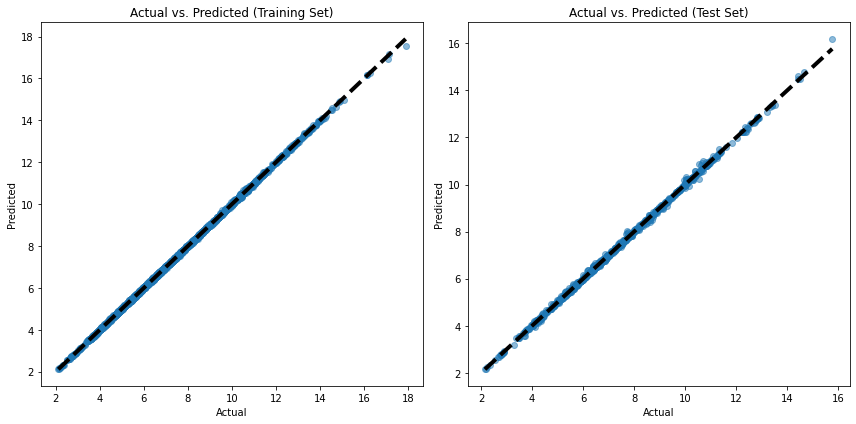

In [35]:
# Predict on the training set
y_train_pred = pipeline.predict(X_train)

# Plot actual vs. predicted values for the training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Training Set)')

# Plot actual vs. predicted values for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Test Set)')

plt.tight_layout()
plt.show()

We define arrival and departure rates, which can be adjusted based on historical data.  
We also define the time interval for the forecast (e.g. 1 hour).

In [36]:
# Define the arrival and departure rates
lambda_rate = 0.05  # example value, can be adjusted based on historical data
mu_rate = 0.03      # example value, can be adjusted based on historical data
time_interval = 1   # for example, 1 hour

We calculate future occupancy based on current occupancy, arrival and departure rates, and time frame.

In [37]:
# Calculate future occupancy (N_{t+h})
current_occupancy = y_pred
future_occupancy = current_occupancy + (lambda_rate - current_occupancy * mu_rate) * time_interval

We calculate expected employment over time using an exponential formula that takes into account the starting rate and initial employment.

In [38]:
# Calculate expected occupancy over time (E_t)
initial_occupancy = current_occupancy[0]  # Assuming the first value as the initial occupancy
expected_occupancy = np.exp(-mu_rate * time_interval) * (initial_occupancy - lambda_rate / mu_rate) + lambda_rate / mu_rate

We calculate employment probabilities based on expected employment.

In [39]:
# Calculate probabilities based on the expected occupancy
probabilities = 1 - np.exp(-expected_occupancy)

We create a dataframe that includes characteristics, expected occupancy rates, expected occupancy, and probabilities.

In [40]:
# Create a DataFrame with the probabilities
probabilities_df = pd.DataFrame({
    'icon': X_test['icon'],
    'moon_phase': X_test['moon_phase'],
    'neighbourhood_bcn': X_test['neighbourhood_bcn'],
    'weighted_occupancy': X_test['weighted_occupancy'],
    'Predicted_Occupancy_Rate': future_occupancy,
    'Expected_Occupancy': expected_occupancy,
    'Probability': probabilities
})

In [41]:
probabilities_df

,icon,moon_phase,neighbourhood_bcn,weighted_occupancy,Predicted_Occupancy_Rate,Expected_Occupancy,Probability
4678,clear-day,0.85,UNKNOWN,2.554066,4.743419,4.744832,0.991303
1432,partly-cloudy-day,0.56,Can Peguera,3.113142,5.751633,4.744832,0.991303
410,partly-cloudy-day,0.69,Can Peguera,3.160306,5.883696,4.744832,0.991303
3869,partly-cloudy-day,0.63,Sarrià,3.885712,7.248114,4.744832,0.991303
5068,rain,0.80,el Bon Pastor,3.779988,7.096584,4.744832,0.991303
...,...,...,...,...,...,...,...
283,partly-cloudy-day,0.75,el Parc i la Llacuna del Poblenou,2.953923,5.384327,4.744832,0.991303
3311,rain,0.43,Sarrià,4.749516,8.745069,4.744832,0.991303
5083,rain,0.80,la Torre Llobeta,3.842024,7.189638,4.744832,0.991303
1456,partly-cloudy-day,0.56,la Verneda i la Pau,3.460387,6.439082,4.744832,0.991303


The expected occupancy and the probability of occupancy appear the same for all rows due to the way they were calculated using a constant initial_occupancy and fixed rates (lambda_rate and mu_rate). This calculation does not take into account the varying values of current_occupancy for each row in the test set, which is why the values are identical.

To correct this, we need to ensure that the expected occupancy and probabilities are calculated based on the individual predicted occupancies for each row.

Here's the corrected approach:

Calculate the expected occupancy based on each row's predicted occupancy.
Calculate the probability for each row based on its specific expected occupancy.

So we change the previous approach by calculating the expected occupancy and probabilities individually for each row, based on the current expected occupancy for each row.

In [42]:
# Calculate expected occupancy for each row individually
expected_occupancy_per_row = np.exp(-mu_rate * time_interval) * (current_occupancy - lambda_rate / mu_rate) + lambda_rate / mu_rate

In [43]:
# Calculate probabilities based on the expected occupancy per row
probabilities_per_row = 1 - np.exp(-expected_occupancy_per_row)

In [44]:
# Create a DataFrame with the probabilities
probabilities_df_corrected = pd.DataFrame({
    'icon': X_test['icon'],
    'moon_phase': X_test['moon_phase'],
    'neighbourhood_bcn': X_test['neighbourhood_bcn'],
    'weighted_occupancy': X_test['weighted_occupancy'],
    'Predicted_Occupancy_Rate': future_occupancy,
    'Expected_Occupancy': expected_occupancy_per_row,
    'Probability': probabilities_per_row
})

In [45]:
probabilities_df_corrected

,icon,moon_phase,neighbourhood_bcn,weighted_occupancy,Predicted_Occupancy_Rate,Expected_Occupancy,Probability
4678,clear-day,0.85,UNKNOWN,2.554066,4.743419,4.744832,0.991303
1432,partly-cloudy-day,0.56,Can Peguera,3.113142,5.751633,5.753509,0.996828
410,partly-cloudy-day,0.69,Can Peguera,3.160306,5.883696,5.885633,0.997221
3869,partly-cloudy-day,0.63,Sarrià,3.885712,7.248114,7.250678,0.999290
5068,rain,0.80,el Bon Pastor,3.779988,7.096584,7.099078,0.999174
...,...,...,...,...,...,...,...
283,partly-cloudy-day,0.75,el Parc i la Llacuna del Poblenou,2.953923,5.384327,5.386034,0.995420
3311,rain,0.43,Sarrià,4.749516,8.745069,8.748320,0.999841
5083,rain,0.80,la Torre Llobeta,3.842024,7.189638,7.192175,0.999248
1456,partly-cloudy-day,0.56,la Verneda i la Pau,3.460387,6.439082,6.441274,0.998406


## Sources used:  
Time-dependent model properties can be used to predict the future occupancy of a parking lot by considering the arrival and departure rates of vehicles.  
In particular:  
- When the parking structure is under-saturated, the expected occupancy will converge to 𝜆/𝜇 after a sufficiently long time.
- If the starting rate 𝜇 is zero, the equation reduces to 𝜆𝑡, indicating linear growth without departures.
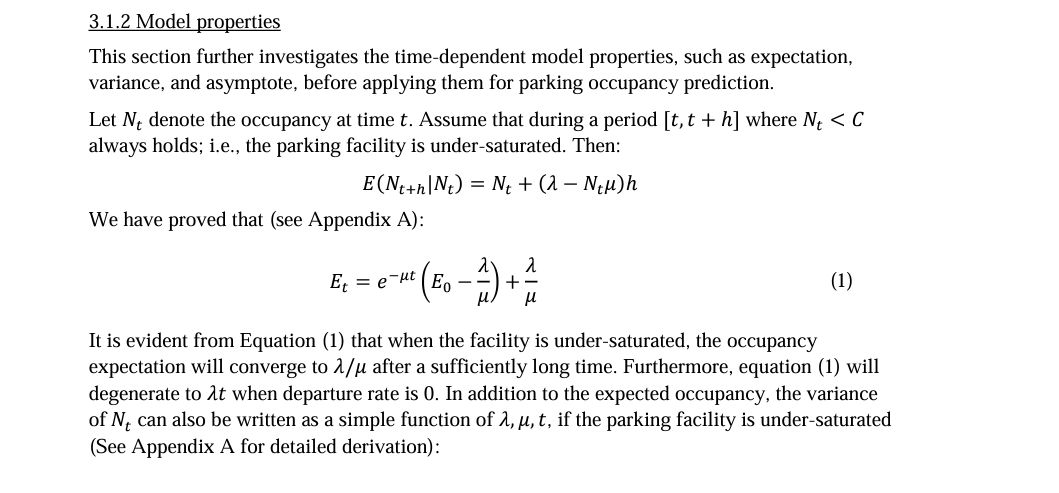